## Naïve Bayes Classifier

In [544]:
import pandas as pd
import numpy as np

## 1. Load the Dataset

In [545]:
#load the Dataset 
Data = pd.read_csv('diabetes_csv.csv')

pd.set_option('mode.chained_assignment', None)

#to allow changing the class label of the dataset
Data.head()

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,tested_positive
1,1,85,66,29,0,26.6,0.351,31,tested_negative
2,8,183,64,0,0,23.3,0.672,32,tested_positive
3,1,89,66,23,94,28.1,0.167,21,tested_negative
4,0,137,40,35,168,43.1,2.288,33,tested_positive


In [546]:
#change the label to numeric values 
Data['class'][Data['class'] == 'tested_positive'] = 1
Data['class'][Data['class'] == 'tested_negative'] = -1


## 2. Split the Dataset into training and test

In [547]:
#SHuffle and split Dataset into Train and Test Datasets 
from sklearn.model_selection import train_test_split

X = Data.iloc[:,:]
y = Data['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10)

## 3. Split the Dataset by class

In [548]:
#Split Trining Data by class 
pos = X_train[X_train['class'] == 1]
neg = X_train[X_train['class'] == -1]

## 4. The mean and the standard deviation of each future values for each class

In [549]:
#Mean and Standard Deviation for each class feature 
posMean = pos.iloc[:,:-1].mean()
negMean = neg.iloc[:,:-1].mean()

posStdev = pos.iloc[:,:-1].std()
negStdev = neg.iloc[:,:-1].std()

## 5. The prior and conditional probabilities

In [550]:
#Prior probabilities
posPrior = pos.shape[0]/len(y_train)
negPrior = neg.shape[0]/len(y_train)

The probability density of the Normal Distribution function 

In [551]:
def xGiveny(x, mean, stdev):
    liklehood = math.exp(-(math.pow(x-mean,2)/(2*math.pow(stdev,2))))
    return (1 / (math.sqrt(2*math.pi) * stdev)) * liklehood

In [552]:
#conditional probabilities
def GNB(x):
    # Compute liklihood for each class
    for i in range(len(x)):
        posliklihood = xGiveny(x[i], posMean[i], posStdev[i])
        negliklihood = xGiveny(x[i], negMean[i], negStdev[i])
        posProbability=1*posliklihood
        negProbability=1*negliklihood
        
     # Compute probability of each class
    posProbability*=posPrior
    negProbability*=negPrior
    
    # Return class with maximum probabilty
    return 1 if posProbability > negProbability else -1

## 6. Predict the testing set

In [553]:
x_test = X_test.iloc[:,:-1]

#Make prediction on the testing set
predict = []
for row in x_test.values:
    predict.append(GNB(row))
    
prediction =pd.DataFrame(predict, columns=['class'])
y_test = pd.DataFrame(y_test, columns=['class'])

In [554]:
#Compute the accuracy, precision, and recall
tp = 0
tn = 0
fp = 0
fn = 0

for i in range(len(predict)):
    if y_test.iloc[i].any()== predict[i]:
        if y_test.iloc[i].any()==1:
            tp+=1
        else:
            tn+=1
    else:
        if y_test.iloc[i].any() ==1:
            fp+=1
        else:
            fn+=1
# accuracy = (true postive + true negative) / total of samples
accuracy = (tp + tn) / len(y_test) 

# precision = true postive / (true postive + false postive)
precision = tp / (tp + fp)

# recall = true postive / (true postive + false negative)
recall = tp / (tp + fn)

#Report the accuracy, precision, and recall
print("Accuracy :", accuracy)
print("precision :", precision)
print("recall :", recall)

Accuracy : 0.7922077922077922
precision : 0.23529411764705882
recall : 0.5714285714285714


## Plot a scatter plot of the data

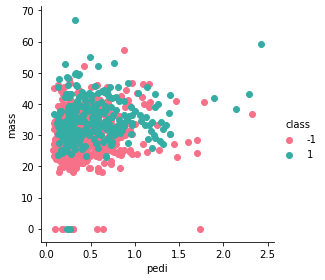

In [555]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.FacetGrid(Data, hue="class", palette="husl", height=4).map(plt.scatter, "pedi", "mass").add_legend()
plt.show()